# Training model

By: Javier Martínez

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay,\
                             accuracy_score,precision_score,recall_score, roc_curve, auc)
from xgboost import XGBClassifier

Data Base

In [2]:
pd_MeLi_ = pd.read_pickle('./data/data_base.pkl')
pd_MeLi = pd_MeLi_.set_index('id',drop=True).copy()

In [3]:
all_features = ['buying_mode',	#str**
                #'seller_address_country',	#str
                'seller_address_state',	#str
                #'seller_address_city',	#str
                'status', #str **
                #'title', #str
                'listing_type_id',	#str
                #'category_id', #str
                #'currency_id', #str	
                #'tags_no_list',
                'mode',#str **

                # Boleanos
                'accepts_mercadopago',	# boolean**
                'automatic_relist',	# boleano**
                'training_data', # boleano#=======
                'local_pick_up', #boleano**
                'free_shipping',#boleano**
                'condition_new',	#boleano #=======
                'MLAAM',
                'MLABC',	
                'MLACD',	
                'MLADC',	
                'MLAMC',	
                'MLAMO',	
                'MLAMP',
                'MLAMS',	
                'MLAOT',
                'MLATB',	
                'MLAVE',
                'MLAVS',	
                'MLAWC',	
                'MLAWT',

                # Numero
                'sold_quantity',	# entero
                'base_price',	#numero**
                'price', #numero **
                #'seller_id',	#int
                'initial_quantity', # entero **
                'available_quantity',	# entero **
        ]


pd_model = pd_MeLi[all_features].copy()

In [4]:
dummies = ['buying_mode',	#str**
            #'seller_address_country',	#str
            'seller_address_state',	#str
            #'seller_address_city',	#str
            'status', #str **
            #'title', #str
            'listing_type_id',	#str
            #'category_id', #str
            #'currency_id', #str	
            #'tags_no_list',
            'mode',#str **
            ]

pd_x_data = pd.get_dummies(pd_model,columns=dummies)

In [5]:
numbers = [ 'sold_quantity',	# entero
            #'base_price',	#numero**
            #'price', #numero **
            #'seller_id',	#int
            'initial_quantity', # entero **
            #'available_quantity',	# entero **
            ]

scaler = MinMaxScaler()
scaler.fit(pd_x_data[numbers])

MinMaxScaler()

In [6]:
pd_x_data[numbers] = scaler.transform(pd_x_data[numbers])

In [7]:
out = 'condition_new'

Data for Model

In [8]:
# Training data
pandas_x_training = pd_x_data.query('training_data==1').copy().fillna(0)
pandas_y_training = pandas_x_training[out]
pandas_x_training.drop(labels=['training_data',out],axis=1,inplace=True)
pandas_x_training.head(3)

,accepts_mercadopago,automatic_relist,local_pick_up,free_shipping,MLAAM,MLABC,MLACD,MLADC,MLAMC,MLAMO,...,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,mode_custom,mode_me1,mode_me2,mode_not_specified
id,,,,,,,,,,,,,,,,,,,,,
MLA4695330653,1,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
MLA7160447179,1,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,1,0
MLA7367189936,1,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
pandas_x_training.shape[0]

90000

In [10]:
# Test Data
pandas_x_test = pd_x_data.query('training_data==0').copy().fillna(0)
pandas_y_test = pandas_x_test[[out]]
pandas_x_test.drop(labels=['training_data',out],axis=1,inplace=True)
pandas_x_test.head(3)

,accepts_mercadopago,automatic_relist,local_pick_up,free_shipping,MLAAM,MLABC,MLACD,MLADC,MLAMC,MLAMO,...,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,mode_custom,mode_me1,mode_me2,mode_not_specified
id,,,,,,,,,,,,,,,,,,,,,
MLA9379759063,1,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,1,0,0,0
MLA8701321701,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
MLA7219741922,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
pandas_x_test.shape[0]

10000

Training Models

In [12]:

class XGB_MODEL():
    """
    model training
    """

    def __init__(self,pandas_x_training,
                    pandas_y_training,
                    pandas_x_test,
                    pandas_y_test):

        self.pandas_x_training = pandas_x_training
        self.pandas_y_training = pandas_y_training
        self.pandas_x_test = pandas_x_test
        self.pandas_y_test = pandas_y_test

    def training(self,n_estimators):

        np.random.seed(2)
        # Model
        self.model = XGBClassifier(n_estimators=n_estimators,
                                   verbosity=0)

        # Fit
        self.model.fit(self.pandas_x_training.values,
                      self.pandas_y_training.values
                    )

        # Metrics
        self.prediction = self.model.predict(pandas_x_test.values)
        self.accuracy = accuracy_score(self.pandas_y_test.values, self.prediction)
        self.precision = precision_score(pandas_y_test.values, self.prediction)
        self.recall =recall_score(self.pandas_y_test.values, self.prediction)

        fpr, tpr, thresholds = roc_curve(self.pandas_y_test.values, self.prediction, pos_label=1)
        self.auc = auc(fpr, tpr)

        self.confusion_matrix = confusion_matrix(self.pandas_y_test.values,self.prediction)

        # Plot
        self.plot_matrix = ConfusionMatrixDisplay(confusion_matrix=self.confusion_matrix)

        # Summary
        self.summary = pd.DataFrame({'accuracy':self.accuracy,
                                    'precision':self.precision,
                                    'recall':self.recall,
                                    'auc':self.auc,
                                    'n_estimators':n_estimators},index=[0])

In [13]:
#==================
def select_model(n_estimators):
    xgb_model = XGB_MODEL(pandas_x_training,
                        pandas_y_training,
                        pandas_x_test,
                        pandas_y_test)
    xgb_model.training(n_estimators=n_estimators)
    return xgb_model
#==================


# Training models
models = list(map(lambda x: select_model(x),[50,100,150,200,250,300,350]))

In [14]:
# Summary models
summary_models = pd.concat(list(map(lambda x: x.summary, models)))
summary_models

,accuracy,precision,recall,auc,n_estimators
0,0.8487,0.871966,0.844062,0.849110,50
0,0.8536,0.880502,0.843692,0.854476,100
0,0.8530,0.882730,0.839623,0.854182,150
0,0.8525,0.884112,0.836848,0.853883,200
0,0.8519,0.882628,0.837403,0.853181,250
0,0.8513,0.882491,0.836293,0.852626,300
0,0.8517,0.883031,0.836478,0.853045,350


In [15]:
# Best Model
best_model = list(filter(lambda x: x.accuracy == summary_models.accuracy.max(),models))

In [16]:
# Confusion Matrix Best Model
best_model[0].confusion_matrix

array([[3975,  619],
       [ 845, 4561]])

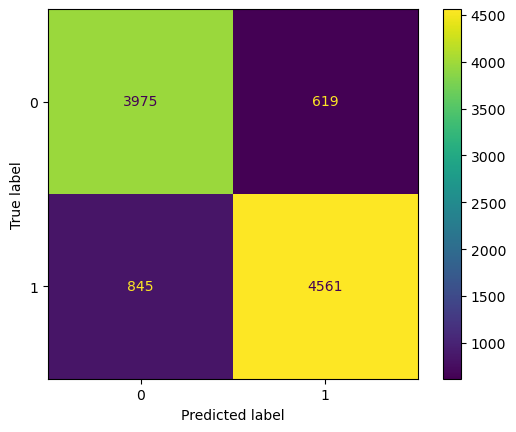

In [17]:
# Confusion Matrix Plot Best Model
best_model[0].plot_matrix.plot()